# Correlation Determination - Single Team Level

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandasql as psql
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [5]:
#Loading our team level regular box score dataframe
regularBoxScoreDFTEST = pd.read_excel('../Production/RawDataFiles/teamRegularBoxScoreGamelogs.xlsx')
#Loading our team level advanced box score dataframe
advancedBoxScoreDFTEST = pd.read_excel('../Production/RawDataFiles/teamAdvancedBoxScoreGamelogs.xlsx')
# Subtracting fields from our regular box score dataframe that we dont need
regularBoxScoreDFTEST = regularBoxScoreDFTEST[[
    'Date',
    'Team',
    'Team_Points',
    'Location',
    'Opponent'
]]
# Subtracting fields from our advanced box score dataframe that we dont need
advancedBoxScoreDFTEST = advancedBoxScoreDFTEST[[
    'Date',
    'Team',
    'Pace',
    'Offensive_EFG',
    'OffensiveRating',
    'TrueShootingRate',
    'Offensive_TurnOver_Rate',
    
    'DefensiveRating'

]]

# Team 1 DataFrame Join
Merged_dfTEST = pd.merge(regularBoxScoreDFTEST, advancedBoxScoreDFTEST, on=['Date','Team'], how='left')

In [6]:
teamList = list(Merged_dfTEST['Team'].unique())

In [7]:
PrimedDF = pd.DataFrame()

In [8]:
for team in teamList:
    Test = Merged_dfTEST[Merged_dfTEST['Team']==team]
    Test['Defensive_Rating_AVG_3_Game'] = Test['DefensiveRating'].rolling(window=3).mean()
    Test['Defensive_Rating_AVG_5_Game'] = Test['DefensiveRating'].rolling(window=5).mean()
    Test['Defensive_Rating_AVG_7_Game'] = Test['DefensiveRating'].rolling(window=7).mean()
    Test['Defensive_Rating_AVG_10_Game'] = Test['DefensiveRating'].rolling(window=10).mean()
    Test['Defensive_Rating_AVG_12_Game'] = Test['DefensiveRating'].rolling(window=12).mean()
    Test = Test.dropna()
    PrimedDF = pd.concat([PrimedDF, Test])

In [13]:
#Merged_dfTESTVS

In [16]:
Merged_dfTESTVS = PrimedDF[PrimedDF['Location'] == 'VS']
Merged_dfTESTVS['Opponent_Stats_Key'] = Merged_dfTESTVS['Date'] + Merged_dfTESTVS['Opponent']
Merged_dfTESTVS['Team_Stats_Key'] = Merged_dfTESTVS['Date'] + Merged_dfTESTVS['Team']

In [18]:
Merged_dfTESTAT = PrimedDF[PrimedDF['Location'] == '@']
Merged_dfTESTAT['Opponent_Stats_Key'] = Merged_dfTESTAT['Date'] + Merged_dfTESTAT['Opponent']
Merged_dfTESTAT['Team_Stats_Key'] = Merged_dfTESTAT['Date'] + Merged_dfTESTAT['Team']

In [20]:
Merged_dfTESTVS.shape

(11811, 18)

In [22]:
Merged_dfTESTAT.shape

(11817, 18)

In [90]:
Merged_dfTESTVS[Merged_dfTESTVS['Team']=='PHI']

,Date,Team,Team_Points,Location,Opponent,Pace,Offensive_EFG,OffensiveRating,TrueShootingRate,Offensive_TurnOver_Rate,DefensiveRating,Defensive_Rating_AVG_3_Game,Defensive_Rating_AVG_5_Game,Defensive_Rating_AVG_7_Game,Defensive_Rating_AVG_10_Game,Defensive_Rating_AVG_12_Game,Opponent_Stats_Key,Team_Stats_Key
4014,2014-11-21,PHI,96,VS,PHO,97.5,0.487,98.4,0.519,16.3,125.1,108.833333,107.70,111.600000,109.74,108.341667,2014-11-21PHO,2014-11-21PHI
4016,2014-11-24,PHI,104,VS,POR,94.7,0.500,109.8,0.550,9.6,120.3,115.533333,109.60,108.571429,109.35,109.908333,2014-11-24POR,2014-11-24PHI
4017,2014-11-26,PHI,91,VS,BRK,99.4,0.453,91.5,0.492,17.8,99.6,107.033333,109.60,105.242857,110.23,108.650000,2014-11-26BRK,2014-11-26PHI
4018,2014-11-29,PHI,103,VS,DAL,98.0,0.459,105.1,0.522,19.6,112.2,110.700000,111.68,108.542857,109.03,108.775000,2014-11-29DAL,2014-11-29PHI
4019,2014-12-01,PHI,103,VS,SAS,100.9,0.494,102.1,0.515,10.7,108.0,106.600000,108.26,109.742857,107.98,110.208333,2014-12-01SAS,2014-12-01PHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4794,2024-03-27,PHI,107,VS,LAC,92.7,0.555,115.5,0.592,11.7,116.6,118.866667,115.24,110.985714,110.97,111.425000,2024-03-27LAC,2024-03-27PHI
4797,2024-04-02,PHI,109,VS,OKC,96.2,0.551,113.3,0.612,16.8,109.1,119.033333,118.80,116.828571,113.40,115.233333,2024-04-02OKC,2024-04-02PHI
4801,2024-04-09,PHI,120,VS,DET,98.4,0.515,122.0,0.555,7.7,103.7,102.266667,104.62,110.157143,112.77,112.275000,2024-04-09DET,2024-04-09PHI
4802,2024-04-12,PHI,125,VS,ORL,103.5,0.580,120.8,0.623,11.5,109.2,105.766667,104.64,107.785714,111.72,111.750000,2024-04-12ORL,2024-04-12PHI


In [92]:
#Merged_dfTESTAT[Merged_dfTESTAT['Team']=='MIL']

In [24]:
Merged_dfTESTAT.columns

Index(['Date', 'Team', 'Team_Points', 'Location', 'Opponent', 'Pace',
       'Offensive_EFG', 'OffensiveRating', 'TrueShootingRate',
       'Offensive_TurnOver_Rate', 'DefensiveRating',
       'Defensive_Rating_AVG_3_Game', 'Defensive_Rating_AVG_5_Game',
       'Defensive_Rating_AVG_7_Game', 'Defensive_Rating_AVG_10_Game',
       'Defensive_Rating_AVG_12_Game', 'Opponent_Stats_Key', 'Team_Stats_Key'],
      dtype='object')

In [26]:
# Write a SQL query
query0 = '''SELECT * FROM Merged_dfTESTAT'''
query1 = '''SELECT 
                vsdf.Date,
                vsdf.Team,
                vsdf.Team_Points,
                vsdf.Location,
                vsdf.Opponent,
                vsdf.Pace,
                vsdf.Offensive_EFG,
                vsdf.OffensiveRating,
                vsdf.TrueShootingRate,
                vsdf.Offensive_TurnOver_Rate,
                --atdf.Defensive_EFG as Opponent_Defensive_EFG,
                atdf.DefensiveRating as Opponent_Defensive_Rating,
                atdf.Defensive_Rating_AVG_3_Game as Opponent_Defensive_Rating_3Game,
                atdf.Defensive_Rating_AVG_5_Game as Opponent_Defensive_Rating_5Game,
                atdf.Defensive_Rating_AVG_7_Game as Opponent_Defensive_Rating_7Game,
                atdf.Defensive_Rating_AVG_10_Game as Opponent_Defensive_Rating_10Game,
                atdf.Defensive_Rating_AVG_12_Game as Opponent_Defensive_Rating_12Game,
                vsdf.Opponent_Stats_Key
                FROM Merged_dfTESTVS vsdf
            LEFT JOIN Merged_dfTESTAT atdf
            ON
            vsdf.Opponent_Stats_Key = atdf.Team_Stats_Key
        '''


query2 = '''SELECT 
                atdf.Date,
                atdf.Team,
                atdf.Team_Points,
                atdf.Location,
                atdf.Opponent,
                atdf.Pace,
                atdf.Offensive_EFG,
                atdf.OffensiveRating,
                atdf.TrueShootingRate,
                atdf.Offensive_TurnOver_Rate,
                --vsdf.Defensive_EFG as Opponent_Defensive_EFG,
                vsdf.DefensiveRating as Oppoenet_Defensive_Rating,
                vsdf.Defensive_Rating_AVG_3_Game as Oppoenet_Defensive_Rating_3Game,
                vsdf.Defensive_Rating_AVG_5_Game as Oppoenet_Defensive_Rating_5Game,
                vsdf.Defensive_Rating_AVG_7_Game as Oppoenet_Defensive_Rating_7Game,
                vsdf.Defensive_Rating_AVG_10_Game as Oppoenet_Defensive_Rating_10Game,
                vsdf.Defensive_Rating_AVG_12_Game as Oppoenet_Defensive_Rating_12Game,               
                atdf.Opponent_Stats_Key
                FROM Merged_dfTESTAT atdf
            LEFT JOIN Merged_dfTESTVS vsdf
            ON
            atdf.Opponent_Stats_Key = vsdf.Team_Stats_Key
        '''

query3= '''
            SELECT * FROM
            (   
                SELECT 
                    vsdf.Date,
                    vsdf.Team,
                    vsdf.Team_Points,
                    vsdf.Location,
                    vsdf.Opponent,
                    vsdf.Pace,
                    vsdf.Offensive_EFG,
                    vsdf.OffensiveRating,
                    vsdf.TrueShootingRate,
                    vsdf.Offensive_TurnOver_Rate,
                    --atdf.Defensive_EFG as Opponent_Defensive_EFG,
                    atdf.DefensiveRating as Oppoenet_Defensive_Rating,
                    atdf.Defensive_Rating_AVG_3_Game as Oppoenet_Defensive_Rating_3Game,
                    atdf.Defensive_Rating_AVG_5_Game as Oppoenet_Defensive_Rating_5Game,
                    atdf.Defensive_Rating_AVG_7_Game as Oppoenet_Defensive_Rating_7Game,
                    atdf.Defensive_Rating_AVG_10_Game as Oppoenet_Defensive_Rating_10Game,
                    atdf.Defensive_Rating_AVG_12_Game as Oppoenet_Defensive_Rating_12Game,
                    vsdf.Opponent_Stats_Key
                    FROM Merged_dfTESTVS vsdf
                LEFT JOIN Merged_dfTESTAT atdf
                ON
                vsdf.Opponent_Stats_Key = atdf.Team_Stats_Key

                UNION ALL

                SELECT 
                    atdf.Date,
                    atdf.Team,
                    atdf.Team_Points,
                    atdf.Location,
                    atdf.Opponent,
                    atdf.Pace,
                    atdf.Offensive_EFG,
                    atdf.OffensiveRating,
                    atdf.TrueShootingRate,
                    atdf.Offensive_TurnOver_Rate,
                    --vsdf.Defensive_EFG as Opponent_Defensive_EFG,
                    vsdf.DefensiveRating as Oppoenet_Defensive_Rating,
                    vsdf.Defensive_Rating_AVG_3_Game as Oppoenet_Defensive_Rating_3Game,
                    vsdf.Defensive_Rating_AVG_5_Game as Oppoenet_Defensive_Rating_5Game,
                    vsdf.Defensive_Rating_AVG_7_Game as Oppoenet_Defensive_Rating_7Game,
                    vsdf.Defensive_Rating_AVG_10_Game as Oppoenet_Defensive_Rating_10Game,
                    vsdf.Defensive_Rating_AVG_12_Game as Oppoenet_Defensive_Rating_12Game, 
                    atdf.Opponent_Stats_Key
                    FROM Merged_dfTESTAT atdf
                LEFT JOIN Merged_dfTESTVS vsdf
                ON
                atdf.Opponent_Stats_Key = vsdf.Team_Stats_Key           
            )aa
        '''


In [28]:
# Execute the SQL query on the DataFrame
result0 = psql.sqldf(query1, locals())
result1 = psql.sqldf(query2, locals())
result2 = psql.sqldf(query3, locals())

result = psql.sqldf(query0, locals())


In [30]:
#result

In [32]:
result2 = result2.dropna()

In [34]:
CorrelationDF = result2[['Team_Points', 'Pace',
       'Offensive_EFG', 'OffensiveRating', 'TrueShootingRate',
       'Offensive_TurnOver_Rate',
       'Oppoenet_Defensive_Rating','Oppoenet_Defensive_Rating_3Game', 'Oppoenet_Defensive_Rating_5Game',
       'Oppoenet_Defensive_Rating_7Game', 'Oppoenet_Defensive_Rating_10Game',
       'Oppoenet_Defensive_Rating_12Game']]

In [36]:
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(CorrelationDF.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
       'Team_Points', 'Pace',
       'Offensive_EFG', 'OffensiveRating', 'TrueShootingRate',
       'Offensive_TurnOver_Rate',
       'Oppoenet_Defensive_Rating','Oppoenet_Defensive_Rating_3Game', 'Oppoenet_Defensive_Rating_5Game',
       'Oppoenet_Defensive_Rating_7Game', 'Oppoenet_Defensive_Rating_10Game',
       'Oppoenet_Defensive_Rating_12Game'])

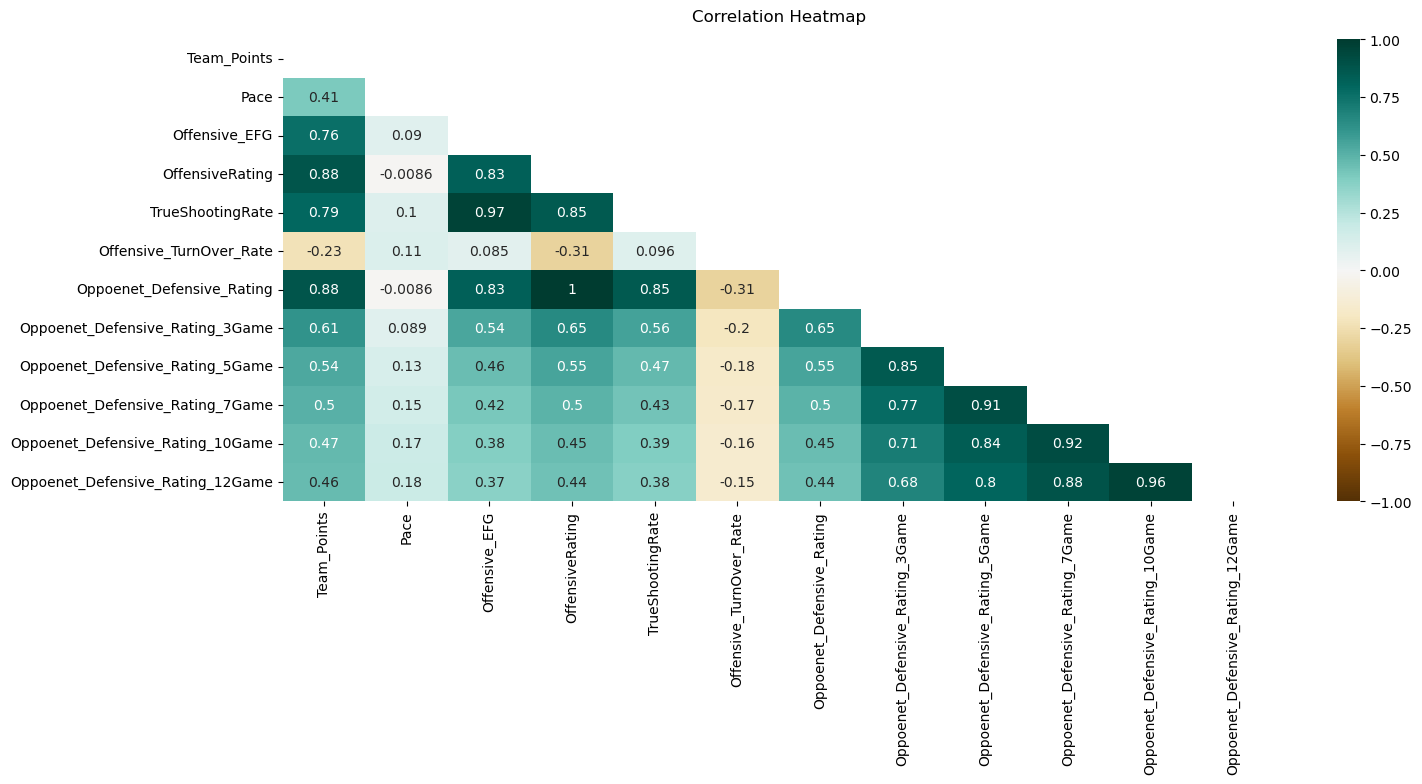

In [38]:
# Plotting our baseline Feature correlation Heatmap
# creating mask 
mask = np.triu(np.ones_like(df_scaled.corr())) 
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_scaled.corr(),mask = mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=13);

Text(0.5, 0, 'Offensive Rating')

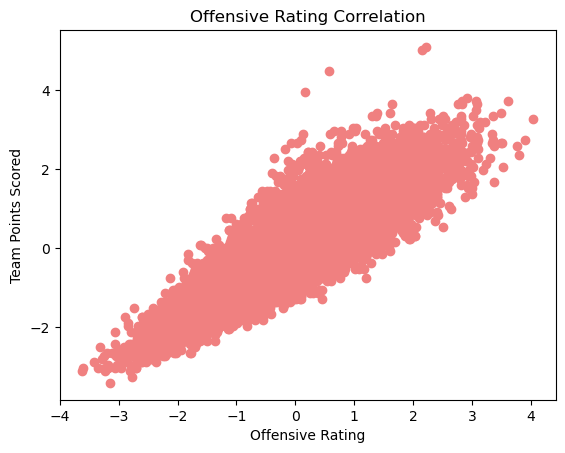

In [40]:
x = df_scaled['OffensiveRating']
y = df_scaled['Team_Points']
plt.scatter(x, y, color = 'lightcoral')
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.title('Offensive Rating Correlation')
plt.ylabel('Team Points Scored')
plt.xlabel('Offensive Rating')

Text(0.5, 0, 'Pace')

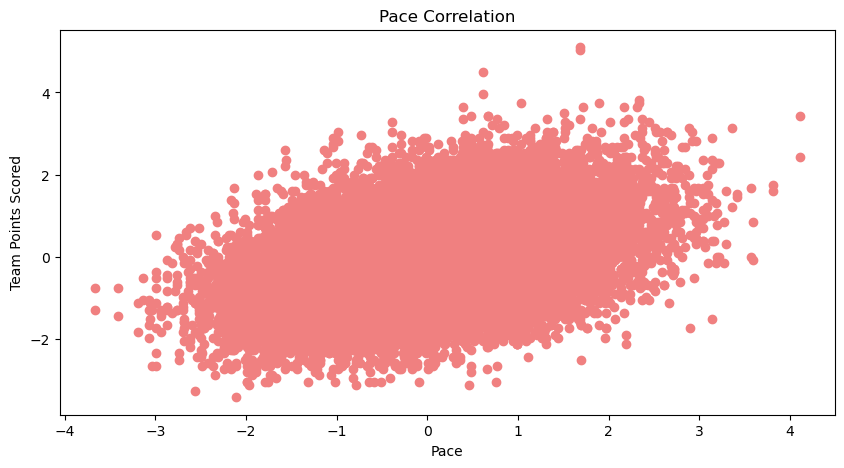

In [42]:
x = df_scaled['Pace']
y = df_scaled['Team_Points']
plt.scatter(x, y, color = 'lightcoral')
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.title('Pace Correlation')
plt.ylabel('Team Points Scored')
plt.xlabel('Pace')

Text(0.5, 0, 'True Shooting %')

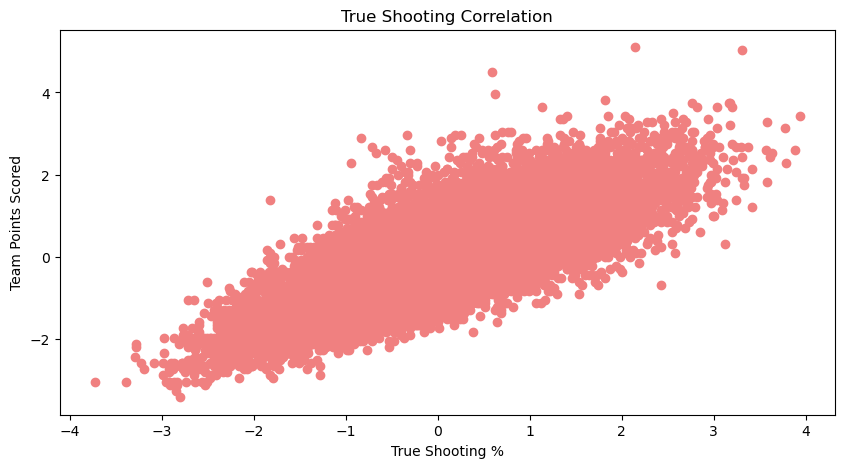

In [44]:
x = df_scaled['TrueShootingRate']
y = df_scaled['Team_Points']
plt.scatter(x, y, color = 'lightcoral')
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.title('True Shooting Correlation')
plt.ylabel('Team Points Scored')
plt.xlabel('True Shooting %')

Text(0.5, 0, 'Offensive eFG%')

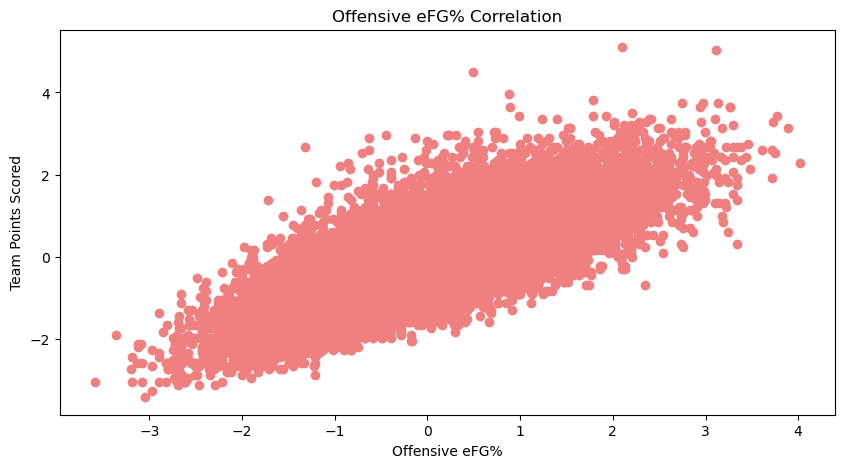

In [46]:
x = df_scaled['Offensive_EFG']
y = df_scaled['Team_Points']
plt.scatter(x, y, color = 'lightcoral')
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.title('Offensive eFG% Correlation')
plt.ylabel('Team Points Scored')
plt.xlabel('Offensive eFG%')

Text(0.5, 0, 'Offensive_TurnOver_Rate')

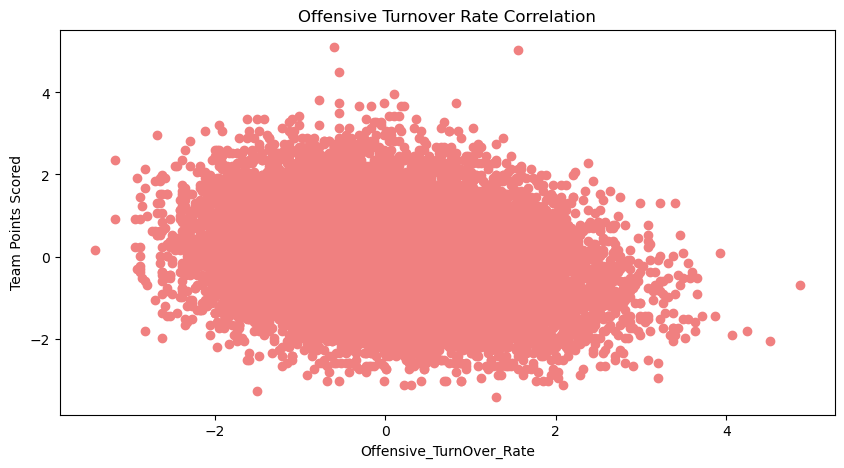

In [48]:
x = df_scaled['Offensive_TurnOver_Rate']
y = df_scaled['Team_Points']
plt.scatter(x, y, color = 'lightcoral')
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.title('Offensive Turnover Rate Correlation')
plt.ylabel('Team Points Scored')
plt.xlabel('Offensive_TurnOver_Rate')

Text(0.5, 0, 'Opponent Defensive Rating')

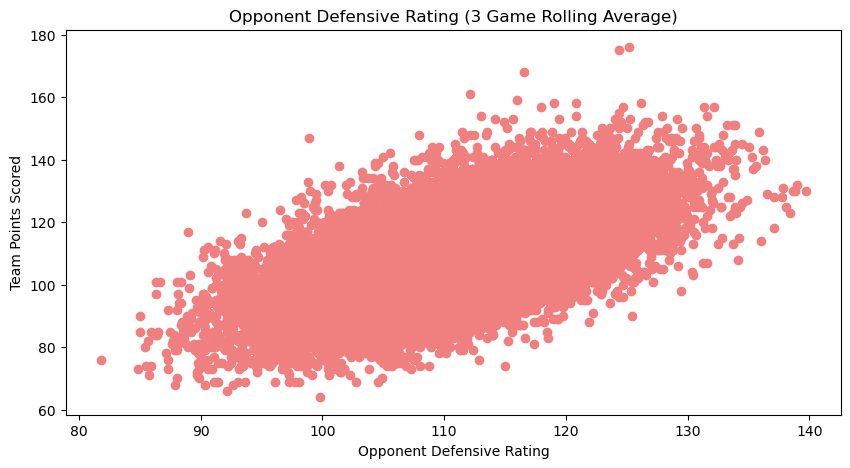

In [66]:
x = result2['Oppoenet_Defensive_Rating_3Game']
y = result2['Team_Points']
plt.scatter(x, y, color = 'lightcoral')
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.title('Opponent Defensive Rating (3 Game Rolling Average)')
plt.ylabel('Team Points Scored')
plt.xlabel('Opponent Defensive Rating')

In [52]:
df_scaled

,Team_Points,Pace,Offensive_EFG,OffensiveRating,TrueShootingRate,Offensive_TurnOver_Rate,Oppoenet_Defensive_Rating,Oppoenet_Defensive_Rating_3Game,Oppoenet_Defensive_Rating_5Game,Oppoenet_Defensive_Rating_7Game,Oppoenet_Defensive_Rating_10Game,Oppoenet_Defensive_Rating_12Game
0,-0.682885,0.002247,-1.018315,-0.718476,-0.608235,0.275474,-0.718476,-1.520290,-1.429461,-1.468227,-1.990483,-1.741532
1,-0.835092,-1.082522,-0.555396,-0.380324,-0.800194,0.713391,-0.380324,-0.928182,-0.512154,-0.840378,-0.870283,-0.687505
2,-0.454574,-1.536153,-0.600195,0.312888,0.223587,-0.483582,0.312888,-0.457090,-1.112517,-0.668496,-1.595226,-2.039753
3,-0.302367,-0.017476,0.624300,-0.270424,0.655495,1.530836,-0.270424,-0.279890,-0.667578,-0.630300,-0.771924,-1.230297
4,0.002046,-1.102245,1.550138,0.634132,1.855239,3.224115,0.634132,1.163642,0.581910,0.238663,-0.017838,0.028856
...,...,...,...,...,...,...,...,...,...,...,...,...
23609,0.610874,-0.076646,0.743763,0.794755,0.591508,0.421447,0.794755,0.619076,0.868378,0.303119,0.337348,0.358634
23610,1.828530,-0.431661,2.505841,2.392523,2.703057,1.793587,2.392523,2.187944,1.444361,1.038394,0.867394,0.770462
23611,-0.226264,0.672831,-0.316471,-0.498677,-0.592239,0.071113,-0.498677,-1.256651,-0.944903,-1.093428,-1.194503,-0.930499
23612,1.904634,0.534770,3.342081,1.910657,3.022989,0.509030,1.910657,0.973476,0.499627,0.219565,0.524958,0.134574


<Axes: ylabel='OffensiveRating'>

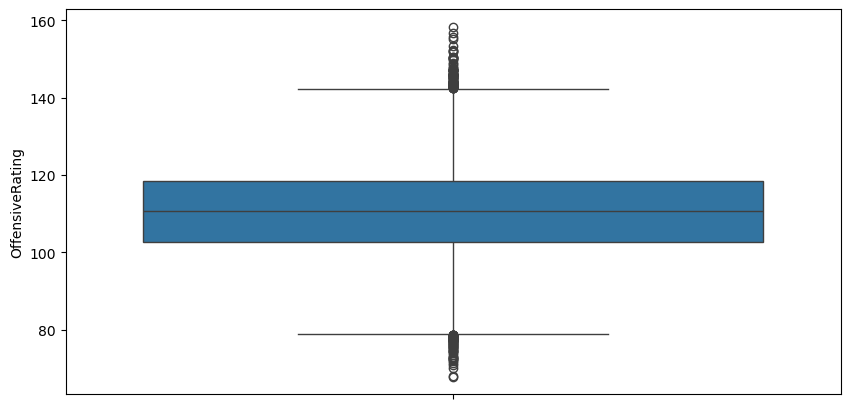

In [60]:
sns.boxplot(result2['OffensiveRating'])

In [64]:
result2[result2['Team_Points']>=140]

,Date,Team,Team_Points,Location,Opponent,Pace,Offensive_EFG,OffensiveRating,TrueShootingRate,Offensive_TurnOver_Rate,Oppoenet_Defensive_Rating,Oppoenet_Defensive_Rating_3Game,Oppoenet_Defensive_Rating_5Game,Oppoenet_Defensive_Rating_7Game,Oppoenet_Defensive_Rating_10Game,Oppoenet_Defensive_Rating_12Game,Opponent_Stats_Key
164,2018-11-04,MIL,144,VS,SAC,110.1,0.600,130.8,0.657,10.6,130.8,109.600000,106.80,107.528571,111.06,109.391667,2018-11-04SAC
168,2018-11-21,MIL,143,VS,POR,111.1,0.597,128.7,0.619,10.8,128.7,116.700000,116.64,112.842857,108.90,107.433333,2018-11-21POR
179,2019-01-04,MIL,144,VS,ATL,112.3,0.620,128.3,0.641,11.1,128.3,120.800000,115.68,113.814286,115.12,115.350000,2019-01-04ATL
185,2019-02-06,MIL,148,VS,WAS,111.5,0.704,132.7,0.709,12.6,132.7,130.966667,120.54,119.057143,114.37,113.583333,2019-02-06WAS
188,2019-02-23,MIL,140,VS,MIN,104.7,0.626,133.7,0.669,9.5,133.7,116.200000,116.80,118.300000,117.05,115.250000,2019-02-23MIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23565,2023-01-13,GSW,144,@,SAS,108.8,0.634,132.3,0.656,10.6,132.3,124.100000,119.00,120.500000,122.67,122.491667,2023-01-13SAS
23586,2023-04-09,GSW,157,@,POR,109.6,0.745,143.2,0.762,13.4,143.2,132.200000,124.54,125.428571,124.92,123.600000,2023-04-09POR
23590,2023-11-03,GSW,141,@,OKC,104.8,0.630,134.6,0.670,12.5,134.6,116.566667,116.30,112.157143,114.76,114.900000,2023-11-03OKC
23602,2024-01-12,GSW,140,@,CHI,97.3,0.628,143.9,0.653,4.5,143.9,120.733333,116.74,112.757143,114.28,112.050000,2024-01-12CHI


In [68]:
CorrelationDF

,Team_Points,Pace,Offensive_EFG,OffensiveRating,TrueShootingRate,Offensive_TurnOver_Rate,Oppoenet_Defensive_Rating,Oppoenet_Defensive_Rating_3Game,Oppoenet_Defensive_Rating_5Game,Oppoenet_Defensive_Rating_7Game,Oppoenet_Defensive_Rating_10Game,Oppoenet_Defensive_Rating_12Game
0,100,97.9,0.458,102.1,0.524,13.6,102.1,98.866667,101.20,101.785714,99.63,101.350000
1,98,92.4,0.489,106.1,0.512,15.1,106.1,103.433333,107.22,105.542857,105.78,106.916667
2,103,90.1,0.486,114.3,0.576,11.0,114.3,107.066667,103.28,106.571429,101.80,99.775000
3,105,97.8,0.568,107.4,0.603,17.9,107.4,108.433333,106.20,106.800000,106.32,104.050000
4,109,92.3,0.630,118.1,0.678,23.7,118.1,119.566667,114.40,112.000000,110.46,110.700000
...,...,...,...,...,...,...,...,...,...,...,...,...
23623,117,97.5,0.576,120.0,0.599,14.1,120.0,115.366667,116.28,112.385714,112.41,112.441667
23624,133,95.7,0.694,138.9,0.731,18.8,138.9,127.466667,120.06,116.785714,115.32,114.616667
23625,106,101.3,0.505,104.7,0.525,12.9,104.7,100.900000,104.38,104.028571,104.00,105.633333
23626,134,100.6,0.750,133.2,0.751,14.4,133.2,118.100000,113.86,111.885714,113.44,111.258333
